In [2]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from collections import Counter
import folium
from sklearn.cluster import KMeans
from textblob import TextBlob
import re

In [3]:
df=pd.read_csv('Dataset.csv')
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


LEVEL : 1 Task : 1 Top Cuisines

Determine the top three most popular cuisines in the dataset

In [4]:
#Determine the top three most popular cuisines in the dataset
cuisine_series=df['Cuisines'].dropna()
all_cuisines=cuisine_series.str.split(', ').explode() # this will split the cuisines and converts them into separate rows 
cuisine_counts=all_cuisines.value_counts()
cuisine_counts.head()


Cuisines
North Indian    3960
Chinese         2735
Fast Food       1986
Mughlai          995
Italian          764
Name: count, dtype: int64

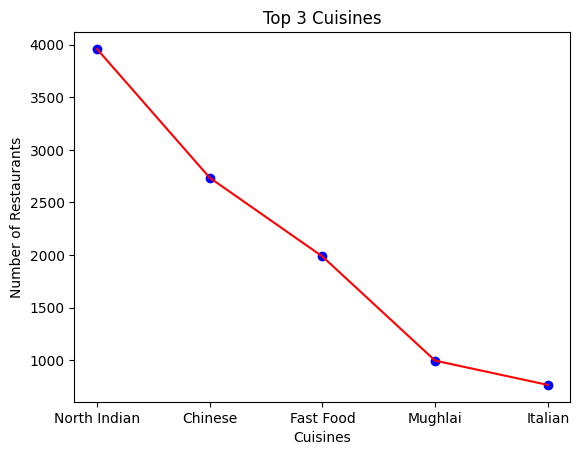

In [5]:
plt.scatter(cuisine_counts.index[:5], cuisine_counts.values[:5],color="blue")
plt.plot(cuisine_counts.index[:5], cuisine_counts.values[:5],color="red")
plt.title("Top 3 Cuisines")
plt.xlabel("Cuisines")
plt.ylabel("Number of Restaurants")
plt.show()

Task 2 : CITY ANALYSIS

In [6]:
city_counts = df['City'].value_counts()
high_rest_city = city_counts.idxmax()
high_rest_count = city_counts.max()
print(f" The city with highest number of restaurants is {high_rest_count} in {high_rest_city} ")

 The city with highest number of restaurants is 5473 in New Delhi 


In [7]:
city_avg_rating = df.groupby('City')['Aggregate rating'].mean().sort_values(ascending=False)
print(city_avg_rating.head())

City
Inner City          4.900000
Quezon City         4.800000
Makati City         4.650000
Pasig City          4.633333
Mandaluyong City    4.625000
Name: Aggregate rating, dtype: float64


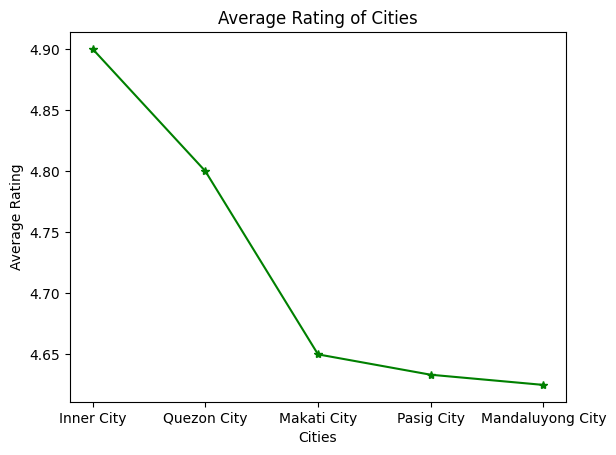

<Figure size 1000x500 with 0 Axes>

In [8]:
plt.plot(city_avg_rating.head().index, city_avg_rating.head().values, marker='*', color='green')
plt.title("Average Rating of Cities")
plt.xlabel("Cities")
plt.ylabel("Average Rating")
plt.figure(figsize=(10, 5))
plt.show()

In [9]:
highest_avg_rating_city = city_avg_rating.idxmax()
highest_avg_rating_value = city_avg_rating.max()
print(f" City with the highest average rating  : {highest_avg_rating_city}, having average rating  : {highest_avg_rating_value}")


 City with the highest average rating  : Inner City, having average rating  : 4.9


Task : 3 Price Range Distribution

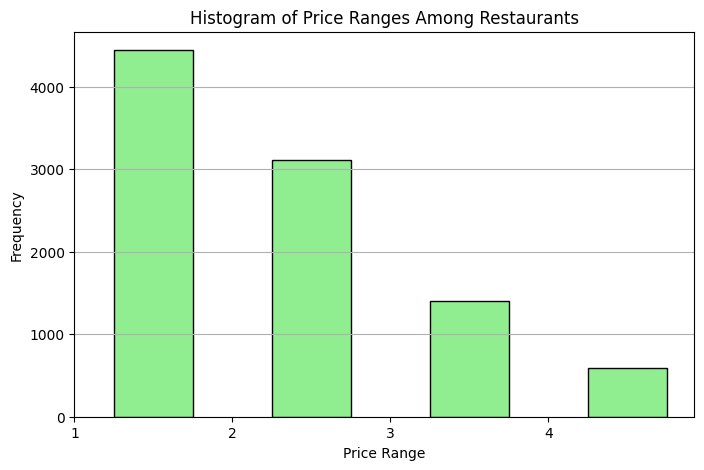

In [10]:
plt.figure(figsize=(8, 5))
plt.hist(df['Price range'].dropna(), bins=range(1, 6), color='lightgreen', edgecolor='black', rwidth=0.5)
plt.title("Histogram of Price Ranges Among Restaurants")
plt.xlabel("Price Range")
plt.ylabel("Frequency")
plt.xticks(range(1, 5))
plt.grid(axis='y')
plt.show()


In [11]:
grouped_price = df.groupby('Price range')['Restaurant Name'].apply(list)
price_range_counts = df['Price range'].value_counts().sort_index()
total_rest = len(df)
price_percent = (price_range_counts / total_rest) * 100
result = pd.DataFrame({'Percentage': price_percent.round(2),'Restaurant Names': grouped_price})
print(result)


             Percentage                                   Restaurant Names
Price range                                                               
1                 46.53  [Caf?? Daniel Briand, Sandubas Caf??, BJ's Cou...
2                 32.59  [Hobing Korean Dessert Cafe, Chez Michou, Casa...
3                 14.74  [Le Petit Souffle, Izakaya Kikufuji, Din Tai F...
4                  6.14  [Heat - Edsa Shangri-La, Ooma, Sambo Kojin, Bu...


Task : 4 Online Delivery

In [12]:
online_delivery_counts = df['Has Online delivery'].value_counts()
total_restaurants = len(df)
online_delivery_percentage = (online_delivery_counts.get('Yes', 0) / total_restaurants) * 100
online_delivery_percentage


np.float64(25.662234321013504)

In [13]:
total_restaurants = len(df)
delivery = df[df['Has Online delivery'] == 'Yes']
delivery_percent = (len(delivery) / total_restaurants) * 100
delivery_rest = delivery['Restaurant Name'].tolist()
print(f"Percentage of restaurants that offer online delivery: {delivery_percent:.2f}%")
print("Restaurants offering online delivery:")
for name in delivery_rest:
    print(name)

Percentage of restaurants that offer online delivery: 25.66%
Restaurants offering online delivery:
Famous Dave's Barbecue
Pizza Di Rocco
Cho Gao - Crowne Plaza Abu Dhabi
Gazebo
Sangeetha Vegetarian Restaurant
Hot Palayok
Applebee's
Tikka Tonight
Bait El Khetyar
Indian By Nature
Via Delhi
Maharaja Bhog
Rasoi Ghar
The Coffee Club
Grand Barbeque Buffet Restaurant
Applebee's
Grub Shack
Kamat
Vadakkan Pepper
Gazebo
Zaroob
Nayaab Haandi
Najmat Lahore Restaurant
Saffron
Nando's
Peking Chinese Restaurant
TGI Friday's
Applebee's
Huber & Holly
Fozzie's Pizzaiolo
La Pino'z Pizza
Mocha
Blue -  Rooftop Cafe Restaurant Bistro
Kabir Restaurant
Puffizza
Cafe Alfresco
The Cafe Baraco
Nini's Kitchen
Mazzo
Sultans of Spice
The Fatty Bao - Asian Gastro Bar
Bombay Brasserie
Onesta
Truffles
Eat Street
Big Brewsky
The Night Factory
Chili's
Midnight Chef
Super Donuts
Taco Bell
Burgrill
That Madras Place
Haunted
Pantry d'or
Palmshore
Chili's
Writer's Cafe
Kaidi Kitchen
Bombay Brasserie
Paradise
L'amandier
Palm

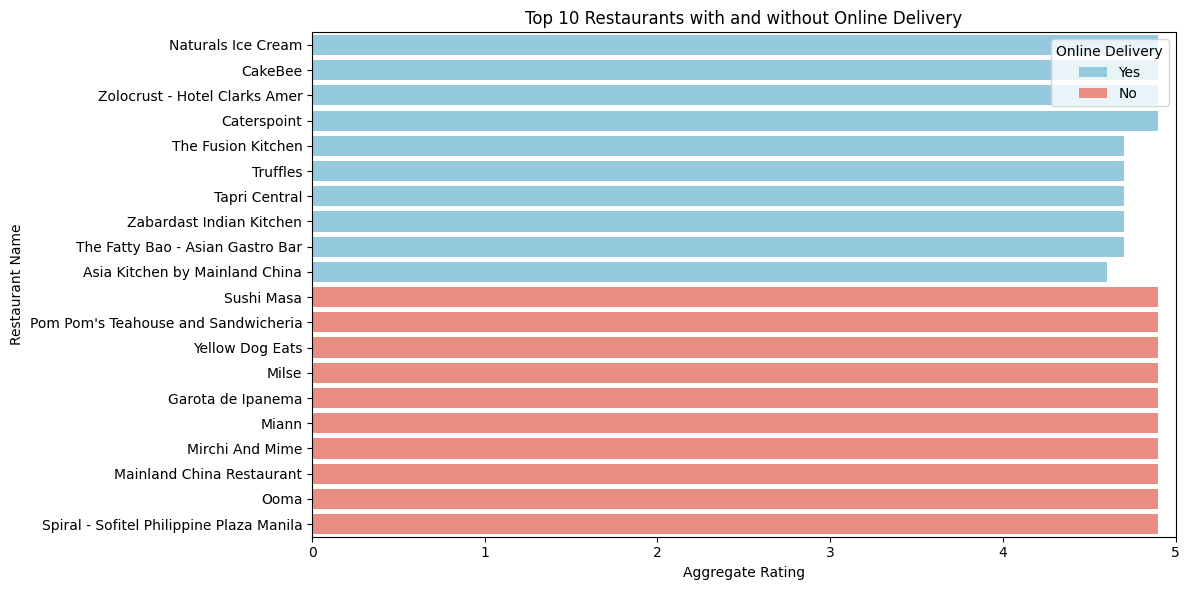

In [14]:

df_unique = df.drop_duplicates(subset='Restaurant Name')
top_yes = df_unique[df_unique['Has Online delivery'] == 'Yes'].sort_values(by='Aggregate rating', ascending=False).head(10)
top_no = df_unique[df_unique['Has Online delivery'] == 'No'].sort_values(by='Aggregate rating', ascending=False).head(10)
top_combined = pd.concat([top_yes, top_no])
plt.figure(figsize=(12, 6))
sn.barplot(data=top_combined, x='Aggregate rating', y='Restaurant Name', hue='Has Online delivery', palette={'Yes': 'skyblue', 'No': 'salmon'})
plt.title("Top 10 Restaurants with and without Online Delivery")
plt.xlabel("Aggregate Rating")
plt.ylabel("Restaurant Name")
plt.legend(title="Online Delivery")
plt.xlim(0, 5)
plt.tight_layout()
plt.show()



LEVEL : 2
Task : 1 Restaurant Ratings

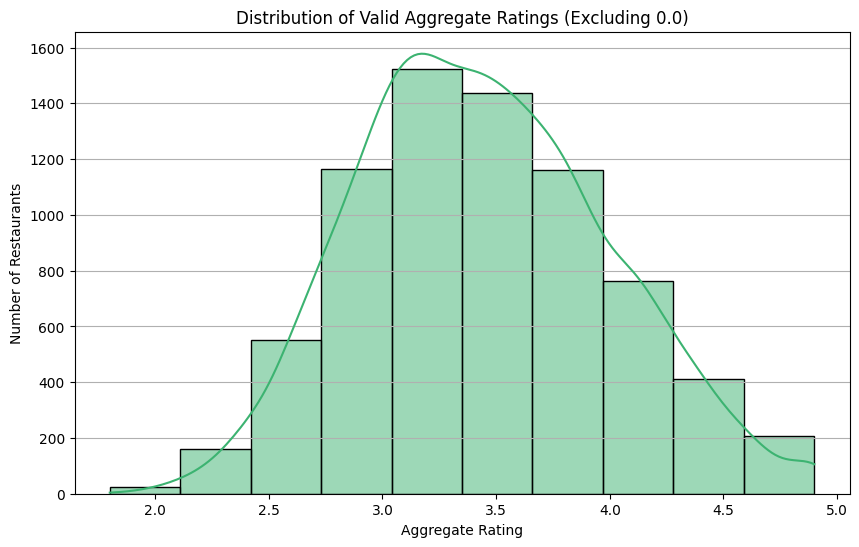

 Most common aggregate rating (excluding 0.0): 3.2

 Ratings distribution:
Aggregate rating
1.8      1
1.9      2
2.0      7
2.1     15
2.2     27
2.3     47
2.4     87
2.5    110
2.6    191
2.7    250
2.8    315
2.9    381
3.0    468
3.1    519
3.2    522
3.3    483
3.4    498
3.5    480
3.6    458
3.7    427
3.8    400
3.9    335
4.0    266
4.1    274
4.2    221
4.3    174
4.4    144
4.5     95
4.6     78
4.7     42
4.8     25
4.9     61
Name: count, dtype: int64


In [15]:
valid_ratings = df[df['Aggregate rating'] > 0]['Aggregate rating']
plt.figure(figsize=(10, 6))
sn.histplot(valid_ratings, bins=10, kde=True, color='mediumseagreen')
plt.title("Distribution of Valid Aggregate Ratings (Excluding 0.0)")
plt.xlabel("Aggregate Rating")
plt.ylabel("Number of Restaurants")
plt.grid(axis='y')
plt.show()
common_rating = valid_ratings.mode()[0]
rating_counts = valid_ratings.value_counts().sort_index()
print(f" Most common aggregate rating (excluding 0.0): {common_rating}")
print("\n Ratings distribution:")
print(rating_counts)

In [16]:
average_votes = df['Votes'].mean()
print(f" Average number of votes per restaurant: {average_votes:.2f}")

 Average number of votes per restaurant: 156.91


 Task: 2 Cuisine Combination


In [17]:
cuisine_series = df['Cuisines'].dropna()
cuisine_combinations = Counter(cuisine_series)
top_cuisine_combinations = cuisine_combinations.most_common(10)
print("Top 10 Most Common Cuisine Combinations:")
for combo, count in top_cuisine_combinations:
    print(f"{combo}: {count} restaurants")

Top 10 Most Common Cuisine Combinations:
North Indian: 936 restaurants
North Indian, Chinese: 511 restaurants
Chinese: 354 restaurants
Fast Food: 354 restaurants
North Indian, Mughlai: 334 restaurants
Cafe: 299 restaurants
Bakery: 218 restaurants
North Indian, Mughlai, Chinese: 197 restaurants
Bakery, Desserts: 170 restaurants
Street Food: 149 restaurants


In [18]:
df_valid = df[(df['Cuisines'].notna()) & (df['Aggregate rating'] > 0)]
cuisine_rating = df_valid.groupby('Cuisines').agg(
    Average_Rating=('Aggregate rating', 'mean'),
    Count=('Aggregate rating', 'count')
).sort_values(by='Average_Rating', ascending=False)
top_rated_combinations = cuisine_rating[cuisine_rating['Count'] >= 10].head(10)
print("Top Cuisine Combinations by Average Rating (min 10 restaurants):")
print(top_rated_combinations)


Top Cuisine Combinations by Average Rating (min 10 restaurants):
                            Average_Rating  Count
Cuisines                                         
Modern Indian                     4.345455     11
Indian                            4.250000     18
Seafood                           4.114286     14
Thai                              4.100000     16
Cafe, Continental, Italian        4.080000     10
American, Burger                  4.076923     13
Japanese, Sushi                   4.044444     18
Italian                           3.950000     50
American                          3.920690     29
Cafe, Italian                     3.909091     11


 Task: 3 Geographic Analysis


In [19]:
df_map = df.dropna(subset=['Latitude', 'Longitude'])
map_center = [df_map['Latitude'].mean(), df_map['Longitude'].mean()]
restaurant_map = folium.Map(location=map_center, zoom_start=12)
for idx, row in df_map.iterrows():
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=f"{row['Restaurant Name']} ({row['Aggregate rating']})",
        icon=folium.Icon(color='blue', icon='cutlery', prefix='fa')
    ).add_to(restaurant_map)
restaurant_map.save("restaurant_locations_map.html")

print("Map saved as 'restaurant_locations_map.html")

Map saved as 'restaurant_locations_map.html


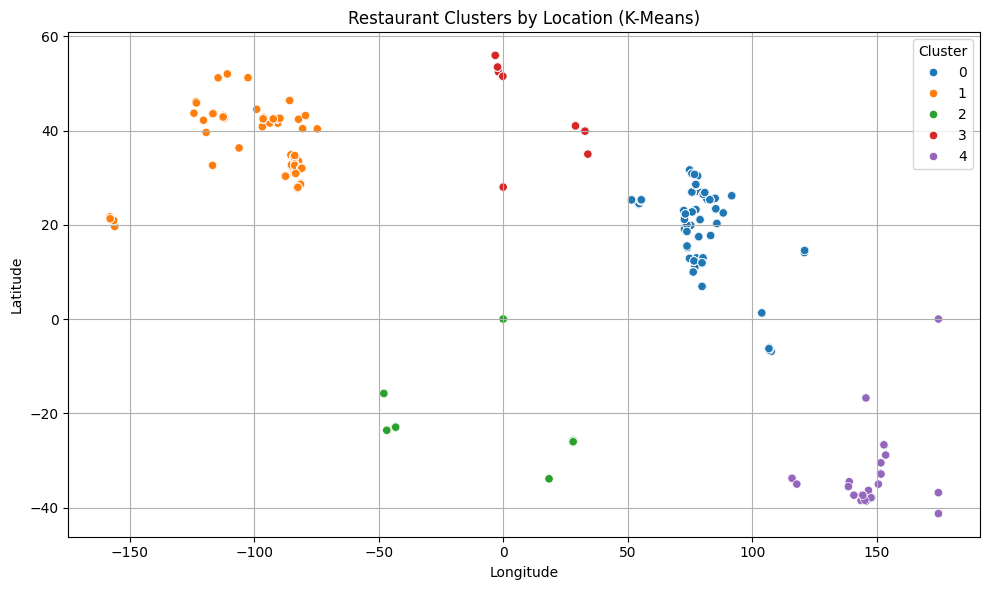

In [20]:
df_geo = df.dropna(subset=['Latitude', 'Longitude'])

# Use only lat/lon for clustering
coords = df_geo[['Latitude', 'Longitude']]

# Apply KMeans clustering
kmeans = KMeans(n_clusters=5, random_state=0)
df_geo['Cluster'] = kmeans.fit_predict(coords)

# Plot the clusters
plt.figure(figsize=(10, 6))
sn.scatterplot(data=df_geo, x='Longitude', y='Latitude', hue='Cluster', palette='tab10')
plt.title("Restaurant Clusters by Location (K-Means)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend(title='Cluster')
plt.grid(True)
plt.tight_layout()
plt.show()

 Task: 4 Restaurant Chains

In [21]:
restaurant_counts = df['Restaurant Name'].value_counts()
restaurant_chains = restaurant_counts[restaurant_counts > 1]
print("Restaurant Chains Found:")
print(restaurant_chains.head(10))

Restaurant Chains Found:
Restaurant Name
Cafe Coffee Day     83
Domino's Pizza      79
Subway              63
Green Chick Chop    51
McDonald's          48
Keventers           34
Pizza Hut           30
Giani               29
Baskin Robbins      28
Barbeque Nation     26
Name: count, dtype: int64


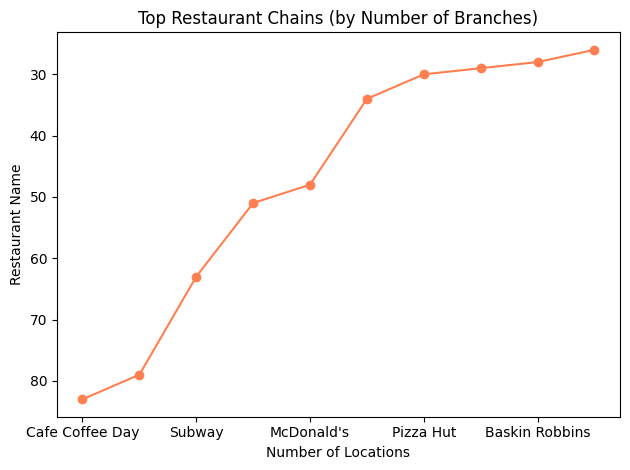

In [22]:
restaurant_chains.head(10).plot(color='coral',marker="o",)
plt.title("Top Restaurant Chains (by Number of Branches)")
plt.xlabel("Number of Locations")
plt.ylabel("Restaurant Name")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

Top 10 Restaurant Chains by Popularity:
                           Average_Rating  Total_Votes  Branches
Restaurant Name                                                 
Barbeque Nation                  4.353846        28142        26
AB's - Absolute Barbecues        4.825000        13400         4
Big Chill                        4.475000        10853         4
Farzi Cafe                       4.366667        10098         6
Truffles                         3.950000         9682         2
Chili's                          4.580000         8156         5
Joey's Pizza                     4.250000         7807         2
Big Yellow Door                  4.266667         7511         3
Saravana Bhavan                  4.133333         7238         3
Starbucks                        3.805556         7139        18


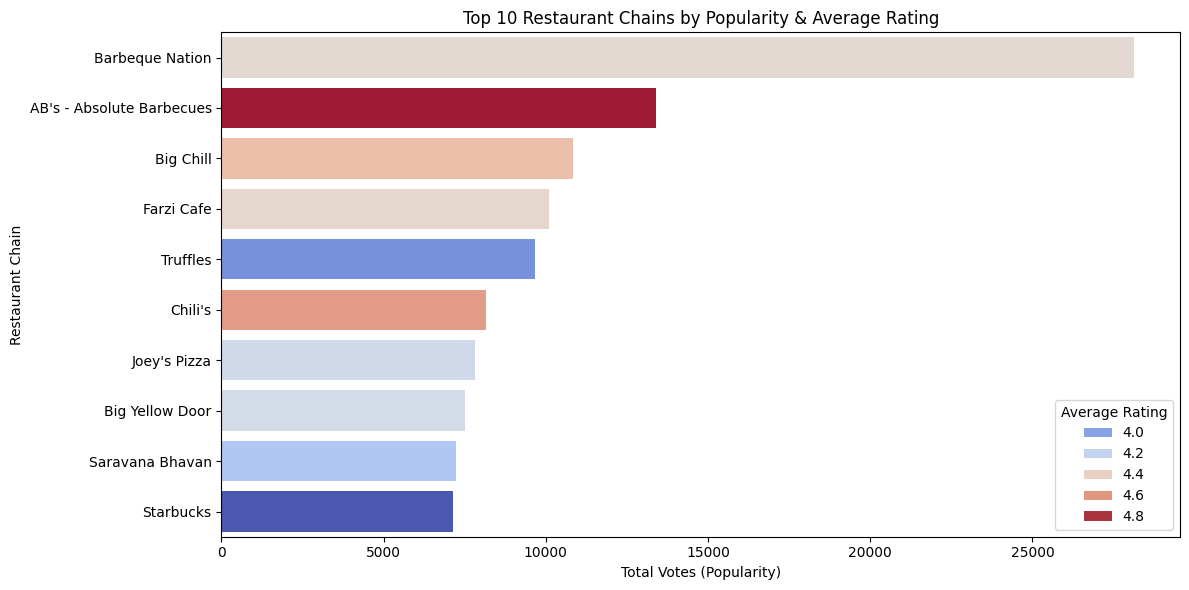

In [23]:
chain_counts = df['Restaurant Name'].value_counts()
chains = chain_counts[chain_counts > 1].index
df_chains = df[df['Restaurant Name'].isin(chains)]
df_chains = df_chains[df_chains['Aggregate rating'] > 0]
chain_stats = df_chains.groupby('Restaurant Name').agg(
    Average_Rating=('Aggregate rating', 'mean'),
    Total_Votes=('Votes', 'sum'),
    Branches=('Restaurant Name', 'count')
).sort_values(by='Total_Votes', ascending=False)
top_chains = chain_stats.head(10)
print("Top 10 Restaurant Chains by Popularity:")
print(top_chains)
plt.figure(figsize=(12, 6))
sn.barplot(x='Total_Votes', y=top_chains.index, data=top_chains, hue='Average_Rating', palette='coolwarm')
plt.title("Top 10 Restaurant Chains by Popularity & Average Rating")
plt.xlabel("Total Votes (Popularity)")
plt.ylabel("Restaurant Chain")
plt.legend(title="Average Rating")
plt.tight_layout()
plt.show()

LEVEL :3

 Task:1 Restaurant Reviews


In [24]:
df_reviews = df['Rating text'].dropna()
def clean_text(text):
    return re.sub(r'[^a-zA-Z\s]', '', text.lower())
positive_words = []
negative_words = []

for review in df_reviews:
    clean_review = clean_text(review)
    blob = TextBlob(clean_review)
    
    if blob.sentiment.polarity > 0.2:
        positive_words += clean_review.split()
    elif blob.sentiment.polarity < -0.2:
        negative_words += clean_review.split()
positive_common = Counter(positive_words).most_common(20)
negative_common = Counter(negative_words).most_common(20)
print("Top Positive Keywords:")
for word, count in positive_common:
    print(f"{word}: {count}")

print("\nTop Negative Keywords:")
for word, count in negative_common:
    print(f"{word}: {count}")

Top Positive Keywords:
good: 3179
very: 1079
excellent: 301

Top Negative Keywords:
poor: 186


Average Review Length (in words): 1.34


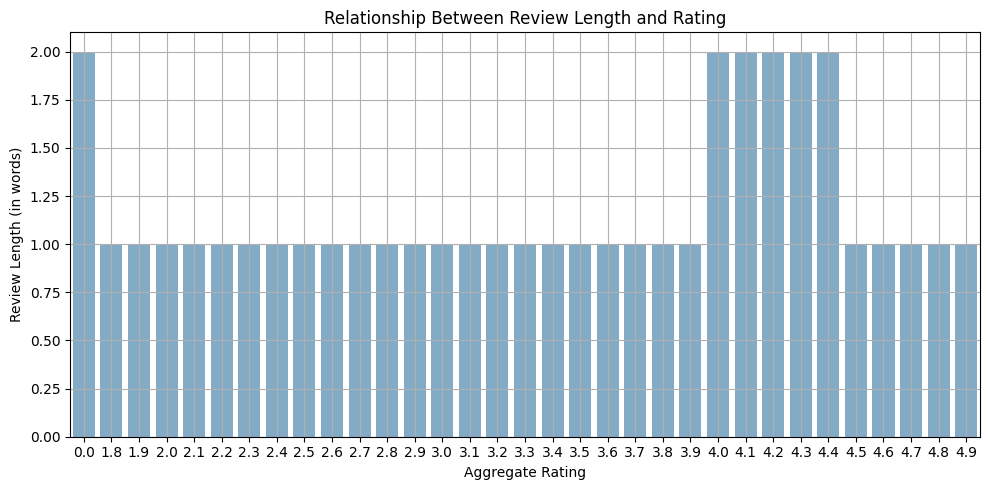

In [25]:
df_filtered = df.dropna(subset=['Rating text', 'Aggregate rating'])
df_filtered['Review_Length'] = df_filtered['Rating text'].apply(lambda x: len(str(x).split()))
avg_length = df_filtered['Review_Length'].mean()
print(f"Average Review Length (in words): {avg_length:.2f}")
plt.figure(figsize=(10, 5))
sn.barplot(data=df_filtered, x='Aggregate rating', y='Review_Length', alpha=0.6)
plt.title("Relationship Between Review Length and Rating")
plt.xlabel("Aggregate Rating")
plt.ylabel("Review Length (in words)")
plt.grid(True)
plt.tight_layout()
plt.show()

Task :2 Votes Analysis

In [26]:
df_clean = df.dropna(subset=['Restaurant Name', 'Votes'])
df_clean['Votes'] = pd.to_numeric(df_clean['Votes'], errors='coerce')
highest_votes = df_clean.loc[df_clean['Votes'].idxmax()]
print("Restaurant with the Highest Votes:")
print(f"Name: {highest_votes['Restaurant Name']}")
print(f"Votes: {highest_votes['Votes']}")
print(f"Rating: {highest_votes['Aggregate rating']}")
print("\n")
non_zero_votes = df_clean[df_clean['Votes'] > 0]
lowest_votes = non_zero_votes.loc[non_zero_votes['Votes'].idxmin()]
print("Restaurant with the Lowest Votes (non-zero):")
print(f"Name: {lowest_votes['Restaurant Name']}")
print(f"Votes: {lowest_votes['Votes']}")
print(f"Rating: {lowest_votes['Aggregate rating']}")

Restaurant with the Highest Votes:
Name: Toit
Votes: 10934
Rating: 4.8


Restaurant with the Lowest Votes (non-zero):
Name: Quiosque Chopp Brahma
Votes: 1
Rating: 0.0


In [27]:
df_clean = df.dropna(subset=['Votes', 'Aggregate rating'])
df_clean['Votes'] = pd.to_numeric(df_clean['Votes'], errors='coerce')
df_clean['Aggregate rating'] = pd.to_numeric(df_clean['Aggregate rating'], errors='coerce')
df_filtered = df_clean[(df_clean['Votes'] > 0) & (df_clean['Aggregate rating'] > 0)]
correlation = df_filtered['Votes'].corr(df_filtered['Aggregate rating'])
print(f"📈 Correlation between Votes and Rating: {correlation:.2f}")

📈 Correlation between Votes and Rating: 0.41


Task: 3 Price Range vs. Online Delivery and Table Booking

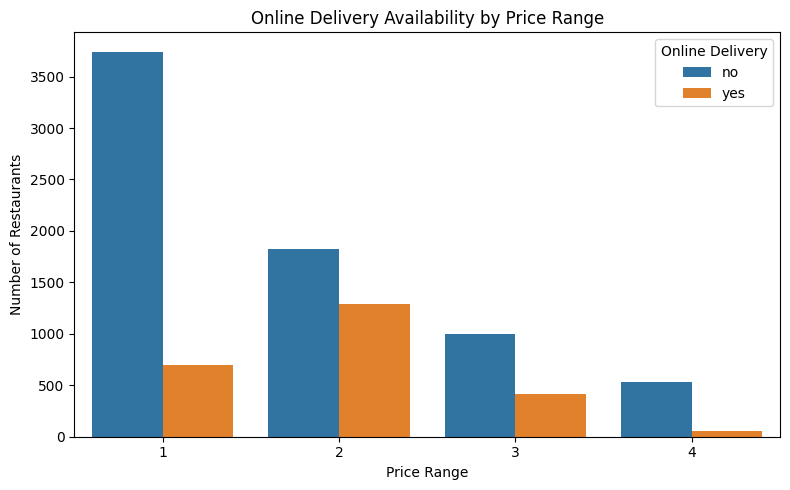

In [28]:
df_subset = df[['Price range', 'Has Online delivery', 'Has Table booking']].dropna()
df_subset['Has Online delivery'] = df_subset['Has Online delivery'].str.strip().str.lower()
df_subset['Has Table booking'] = df_subset['Has Table booking'].str.strip().str.lower()
plt.figure(figsize=(8, 5))
sn.countplot(data=df_subset, x='Price range', hue='Has Online delivery')
plt.title("Online Delivery Availability by Price Range")
plt.xlabel("Price Range")
plt.ylabel("Number of Restaurants")
plt.legend(title='Online Delivery')
plt.tight_layout()
plt.show()


In [29]:
df_subset = df[['Price range', 'Has Online delivery', 'Has Table booking']].dropna()
df_subset['Has Online delivery'] = df_subset['Has Online delivery'].str.strip().str.lower()
df_subset['Has Table booking'] = df_subset['Has Table booking'].str.strip().str.lower()
df_subset['OnlineDeliveryBinary'] = df_subset['Has Online delivery'].apply(lambda x: 1 if x == 'yes' else 0)
df_subset['TableBookingBinary'] = df_subset['Has Table booking'].apply(lambda x: 1 if x == 'yes' else 0)
grouped = df_subset.groupby('Price range')[['OnlineDeliveryBinary', 'TableBookingBinary']].mean() * 100
print(grouped)

             OnlineDeliveryBinary  TableBookingBinary
Price range                                          
1                       15.774077            0.022502
2                       41.310633            7.677482
3                       29.190341           45.738636
4                        9.044369           46.757679


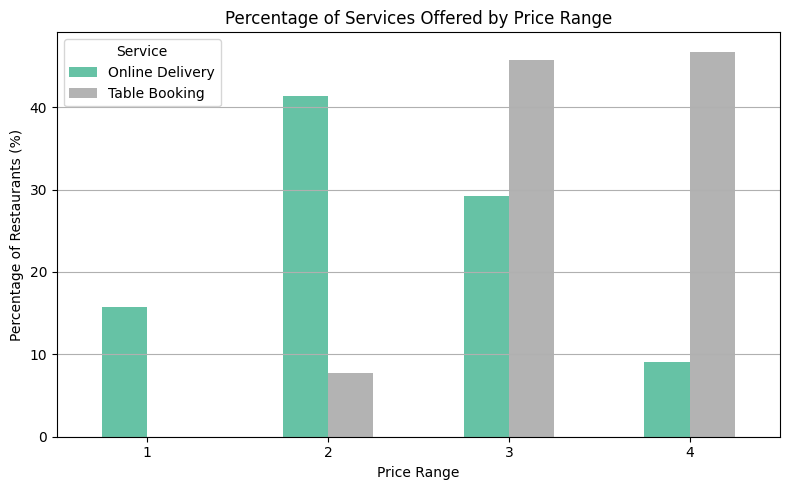

In [30]:
grouped.plot(kind='bar', figsize=(8, 5), colormap='Set2')
plt.title("Percentage of Services Offered by Price Range")
plt.ylabel("Percentage of Restaurants (%)")
plt.xlabel("Price Range")
plt.xticks(rotation=0)
plt.legend(['Online Delivery', 'Table Booking'], title='Service')
plt.grid(axis='y')
plt.tight_layout()
plt.show()
